In [3]:
import cv2 as cv # type: ignore
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore

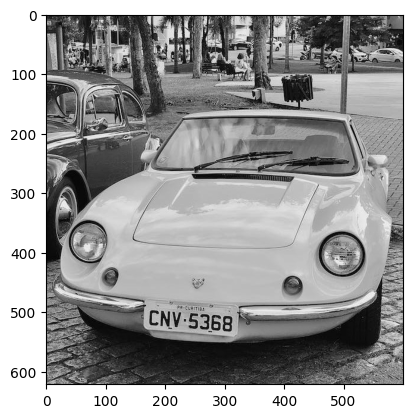

In [4]:
img_grises=cv.imread(r'ImagenesMuestra\CochesVarios\coche02.jpeg',cv.IMREAD_GRAYSCALE)
plt.imshow(img_grises,  cmap='gray')

In [5]:
def agrega_ruido_salpimienta_manual(imagen_entrada, nivel_sal, nivel_pimienta):

    imagen_con_ruido_manual = np.copy(imagen_entrada)
    filas, cols = imagen_entrada.shape
    
    for i in range(filas):
        for j in range(cols):
            rand = np.random.rand()
            if rand < nivel_sal:
                imagen_con_ruido_manual[i, j] = 255  # 'Sal'
            elif rand < nivel_pimienta:
                imagen_con_ruido_manual[i, j] = 0  # 'Pimienta'
    
    return imagen_con_ruido_manual


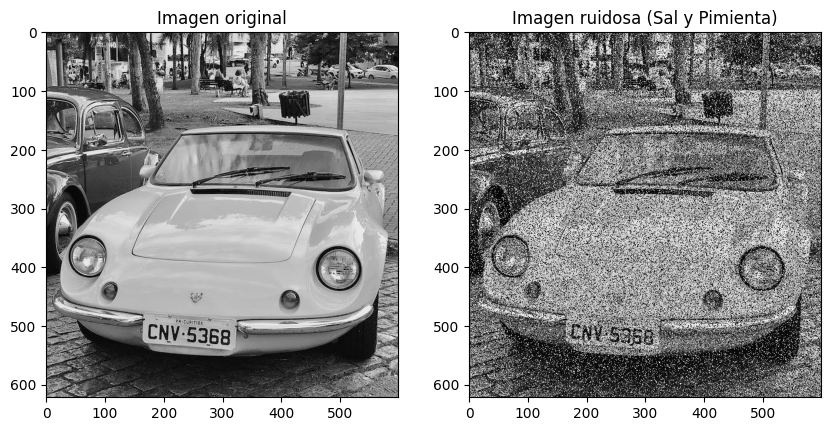

In [6]:
sal = 0.1
pimienta = 0.3
imagen_ruido_manual = agrega_ruido_salpimienta_manual(img_grises, sal, pimienta)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen original')
plt.imshow(img_grises, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Imagen ruidosa (Sal y Pimienta)')
plt.imshow(imagen_ruido_manual, cmap='gray')

plt.show()

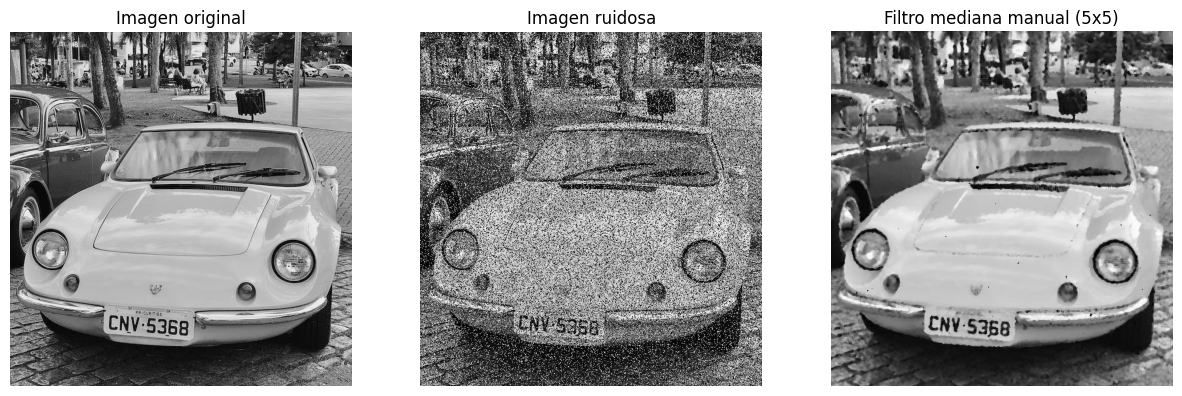

In [7]:
def filtro_mediana_manual(imagen, tamaño_kernel):
    borde = tamaño_kernel // 2
    filas, cols = imagen.shape
    imagen_filtrada = np.zeros((filas - 2 * borde, cols - 2 * borde), dtype=np.uint8)
    
    for i in range(borde, filas - borde):
        for j in range(borde, cols - borde):
            ventana = imagen[i - borde:i + borde + 1, j - borde:j + borde + 1]
            imagen_filtrada[i - borde, j - borde] = np.median(ventana)
    
    return imagen_filtrada

# Aplicar filtro de la mediana manual
imagen_filtrada_mediana_manual = filtro_mediana_manual(imagen_ruido_manual, 5)

# Mostrar la imagen original, la imagen con ruido y la imagen filtrada
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen original')
plt.imshow(img_grises, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Imagen ruidosa')
plt.imshow(imagen_ruido_manual, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Filtro mediana manual (5x5)')
plt.imshow(imagen_filtrada_mediana_manual, cmap='gray')
plt.axis('off')

plt.show()


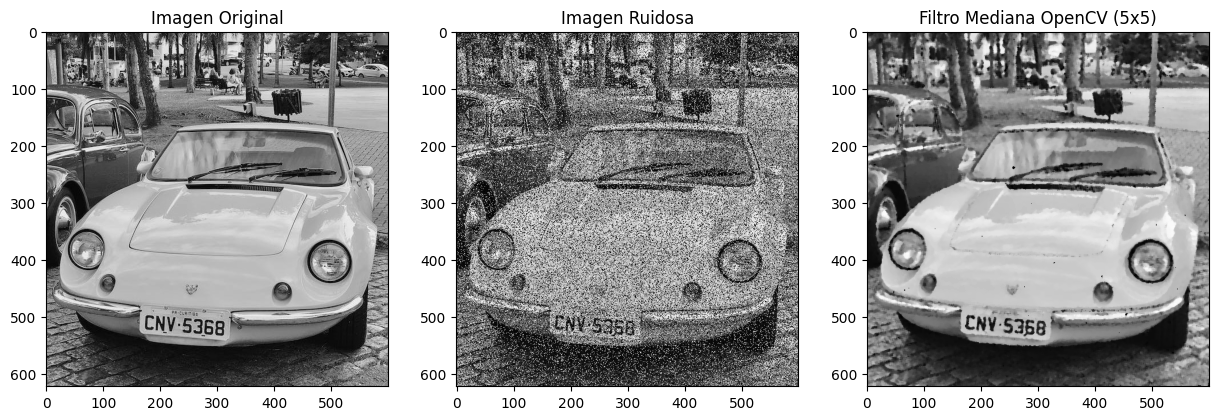

In [8]:
imagen_filtrada_mediana_opencv = cv.medianBlur(imagen_ruido_manual, 5)

# Mostrar la imagen original, la imagen con ruido y la imagen filtrada 
# usando OpenCV
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen Original')
plt.imshow(img_grises, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Imagen Ruidosa')
plt.imshow(imagen_ruido_manual, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Filtro Mediana OpenCV (5x5)')
plt.imshow(imagen_filtrada_mediana_opencv, cmap='gray')

plt.show()


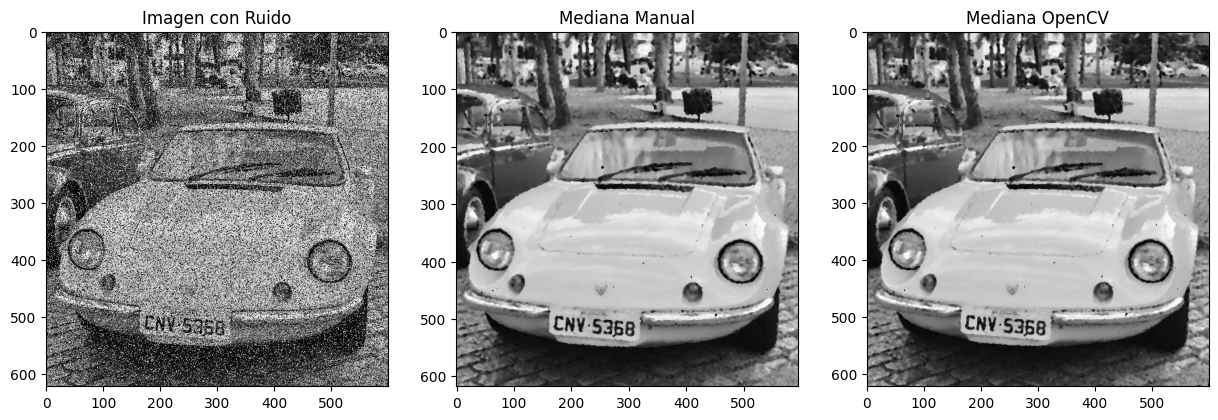

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Imagen con Ruido')
plt.imshow(imagen_ruido_manual, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Mediana Manual')
plt.imshow(imagen_filtrada_mediana_manual, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Mediana OpenCV')
plt.imshow(imagen_filtrada_mediana_opencv, cmap='gray')

plt.show()


In [10]:
def calcular_mse(imagen_original, imagen_filtrada):
    # Calcula la diferencia entre las imágenes
    diferencia = imagen_original - imagen_filtrada
    # Eleva al cuadrado las diferencias
    cuadrado_diferencia = np.square(diferencia)
    # Calcula el promedio de los valores
    mse = np.mean(cuadrado_diferencia)
    return mse
# Calcular el MSE
mse_manual = calcular_mse(img_grises[2:-2, 2:-2], imagen_filtrada_mediana_manual)
mse_opencv = calcular_mse(img_grises, imagen_filtrada_mediana_opencv)

# Mostrar los resultados
print(f'MSE del filtro manual: {mse_manual}')
print(f'MSE del filtro OpenCV: {mse_opencv}')

MSE del filtro manual: 54.365910275623904
MSE del filtro OpenCV: 54.63530010718114
